In [119]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp
import math

from typing import List, Callable

# Bernstein Polynomials
https://de.wikipedia.org/wiki/Bernsteinpolynom

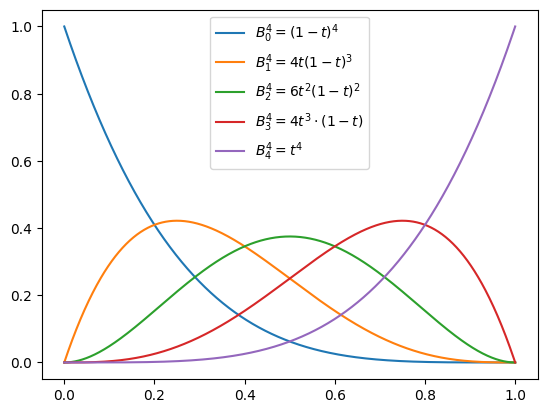

In [169]:
from sympy.abc import t

def bernstein_polynomials(degree: int):
    for i in range(degree+1):
        yield math.comb(degree, i)*t**i*(1-t)**(degree-i)

X = np.linspace(0,1,num=1000)
for i, B in enumerate(bernstein_polynomials(degree=4)):
    plt.plot(X, smp.lambdify(t, B)(X), label=f'$B^4_{i}={smp.latex(B)}$')

plt.legend()
plt.show()

## Uniform approximation of a function using Bernstein basis

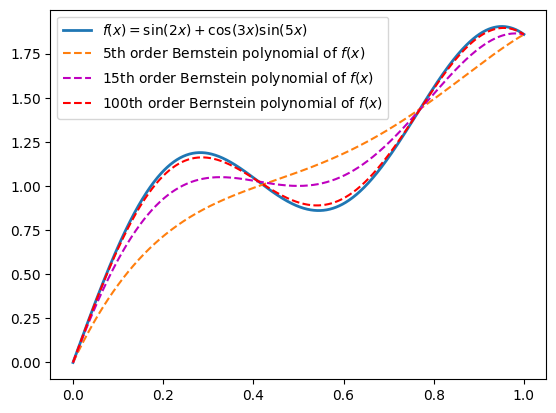

In [176]:
from sympy.abc import i

def bernstein_approx(f: Callable, n: int) -> Callable:
    B_n_ = [*bernstein_polynomials(degree=n)]
    return smp.lambdify(t, sum([B_n_[i] * f(i/n) for i in range(n+1)]))

f = lambda x: np.sin(2*x) + np.cos(3*x)*np.sin(5*x)

plt.plot(X, f(X), label='$f(x)=\sin(2x)+\cos(3x)\sin(5x)$', linewidth='2')

plt.plot(X, bernstein_approx(f, 5)(X), '--', label=f'{5}th order Bernstein polynomial of $f(x)$')
plt.plot(X, bernstein_approx(f, 15)(X), 'm--', label=f'{15}th order Bernstein polynomial of $f(x)$')
plt.plot(X, bernstein_approx(f, 100)(X), 'r--', label=f'{100}th order Bernstein polynomial of $f(x)$')

plt.legend()
plt.show()